# Использование моделей машинного обучения с целью персонализации предложений постоянных клиентов для увеличения их покупательной активность.

**Описание данных:**

Будем работать с четырьмя датасетами: market_file.csv, market_money.csv, market_time.csv, money.csv.


- Файл market_file.csv содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. Описание данных:
    - id — номер покупателя в корпоративной базе данных.
    - Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    - Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
    - Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
    - Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
    - Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


- Файл market_money.csv - это таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. Описание данных:
    - id — номер покупателя в корпоративной базе данных.
    - Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - Выручка — сумма выручки за период.


- Файл market_time.csv — это таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. Описание данных:
    - id — номер покупателя в корпоративной базе данных.
    - Период — название периода, во время которого зафиксировано общее время.
    - минут — значение времени, проведённого на сайте, в минутах.


- Файл money.csv — это таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Описание данных:
    - id — номер покупателя в корпоративной базе данных.
    - Прибыль — значение прибыли.

**Описание проекта:** Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.


**Цель проекта:** разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.


**План работ:**
* Загрузить данные
* Предобработать данные
* Провести исследовательский анализ данных
* Объединить таблицы
* Провести корреляционный анализ принзнаков 
* Исопльзовать пайпалйны
* Провести анализ важности признаков
* Провести сегментацию покупателей
* Составить итоговые выводы

In [1]:
!pip install shap

import shap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    LabelEncoder
)
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

     |████████████████████████████████| 539 kB 1.9 MB/s eta 0:00:01


## Загрузка данных

In [2]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')

In [3]:
market_file.info()
market_file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
market_money.info()
market_money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [5]:
market_time.info()
market_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [6]:
money.info()
money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**Вывод:** Данные соответствуют описанию задачи. Названия некоторых столбцов необходимо будет изменить в соответствии со стандартами оформления данных на этапе предобработки.

## Предобработка данных

### Датафрейм market_file

In [7]:
# Приведение названий столбцов датафрейма market_file к нормальному оформлению
market_file.columns = ['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит']
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [8]:
# Проверка пропусков
market_file.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [9]:
# Поиск явных дубликатов
print('Количество дубликатов:', market_file.duplicated().sum())

Количество дубликатов: 0


In [10]:
# Обработка неявных дубликатов
market_file['тип_сервиса'].replace('стандартт', 'стандарт', inplace=True)
market_file['тип_сервиса'].value_counts()

стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64

### Датафрейм market_money

In [11]:
# Приведение названий столбцов датафрейма market_money к нормальному оформлению
market_money.columns = market_money.columns.str.lower()
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [12]:
# Проверка пропусков
market_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

In [13]:
# Поиск дубликатов
print('Количество дубликатов:', market_money.duplicated().sum())

Количество дубликатов: 0


In [14]:
# Обработка неявных дубликатов
market_money['период'].replace('препредыдущий_месяц', 'предыдущий_месяц', inplace=True)
market_money['период'].value_counts()

предыдущий_месяц    2600
текущий_месяц       1300
Name: период, dtype: int64

### Датафрейм market_time

In [15]:
# Приведение названий столбцов датафрейма market_time к нормальному оформлению
market_time.columns = market_time.columns.str.lower()
market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [16]:
# Проверка пропусков
market_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

In [17]:
# Поиск дубликатов
print('Количество дубликатов:', market_time.duplicated().sum())

Количество дубликатов: 0


### Датафрейм money

In [18]:
# Приведение названий столбцов датафрейма market_time к нормальному оформлению
money.columns = money.columns.str.lower()
money.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [19]:
# Проверка пропусков
money.isna().sum()

id         0
прибыль    0
dtype: int64

In [20]:
# Поиск дубликатов
print('Количество дубликатов:', money.duplicated().sum())

Количество дубликатов: 0


**Вывод:** На этапе предобработке данных названия столбцов были приведены к нормальному виду во всех датафремах. Пропуски и явные дубликаты в данных отсутствовали. А неявные были обработаны.

## Исследовательский анализ данных

### Датафрейм market_file

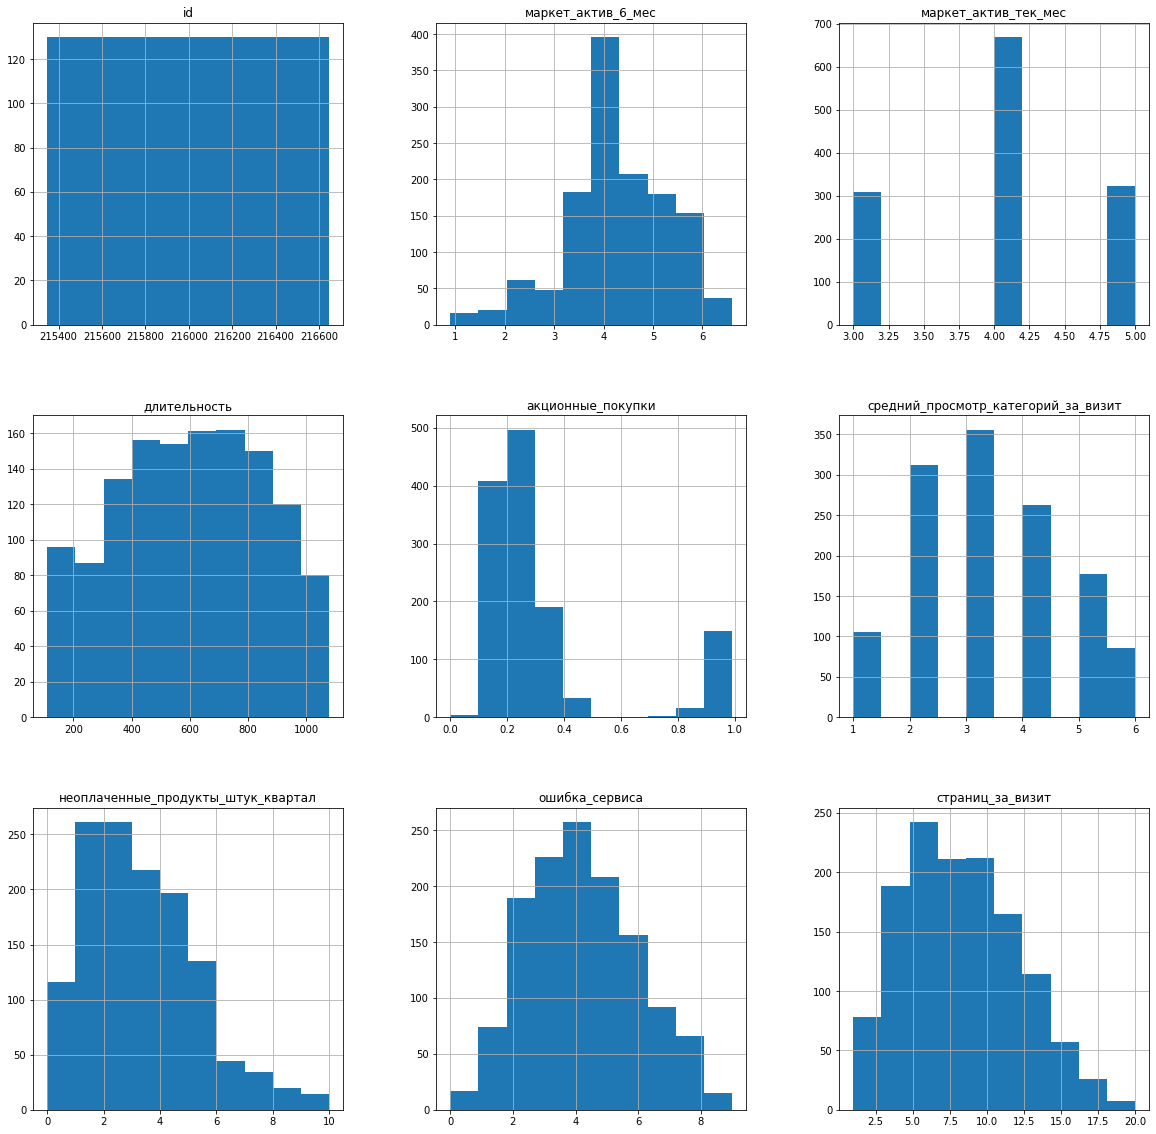

In [21]:
# Выбросы отсутсвуют 
market_file.hist(figsize=(20, 20));

In [22]:
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<AxesSubplot:title={'center':'Boxplot'}>

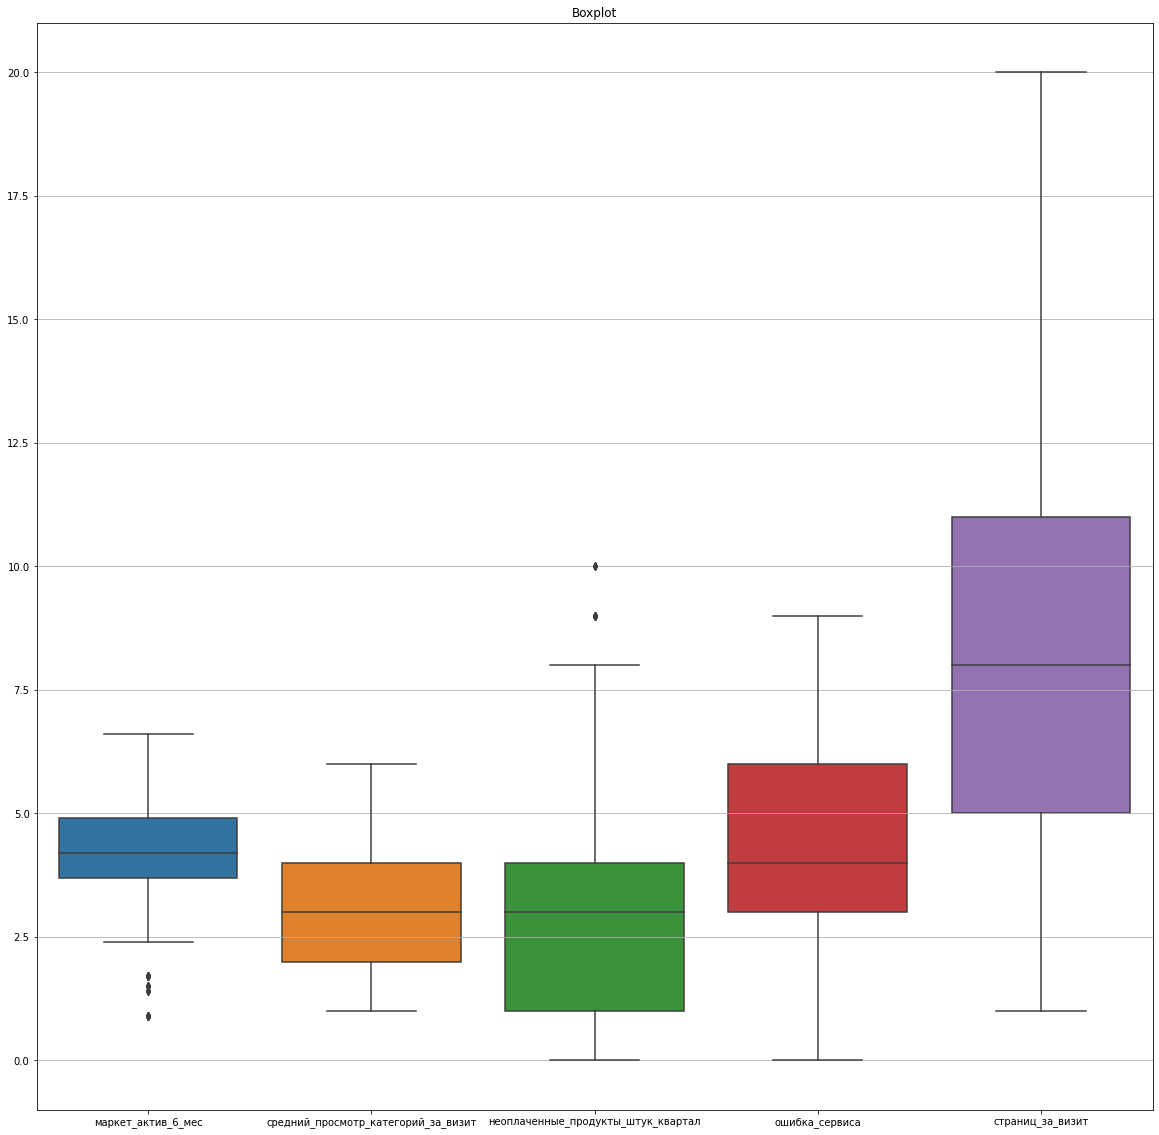

In [23]:
to_box = market_file.drop(['id', 'длительность', 'маркет_актив_тек_мес', 'акционные_покупки'], axis=1)

#График «ящик с усами» по глобальным продажам игр в разбивке по платформам.
plt.figure(figsize=(20, 20))
plt.grid(True)
plt.title('Boxplot')
sns.boxplot(data=to_box)

<AxesSubplot:title={'center':'Boxplot'}>

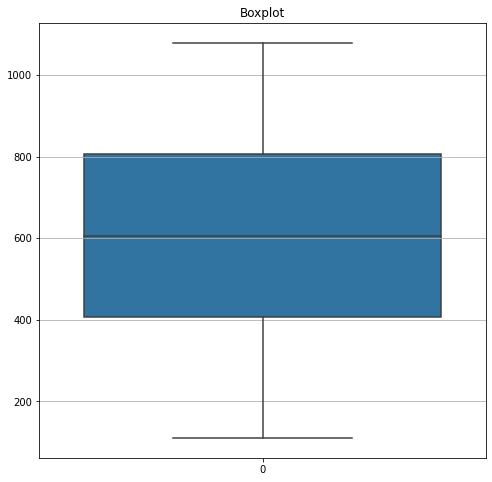

In [24]:
#График «ящик с усами» 
plt.figure(figsize=(8, 8))
plt.grid(True)
plt.title('Boxplot')
sns.boxplot(data=market_file['длительность'])

In [25]:
'маркет_актив_тек_мес', 'акционные_покупки'

('маркет_актив_тек_мес', 'акционные_покупки')

<AxesSubplot:title={'center':'Boxplot'}>

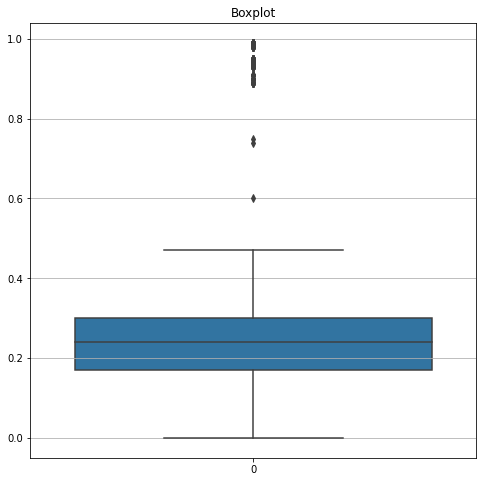

In [26]:
#График «ящик с усами» 
plt.figure(figsize=(8, 8))
plt.grid(True)
plt.title('Boxplot')
sns.boxplot(data=market_file['акционные_покупки'])

<AxesSubplot:title={'center':'Boxplot'}>

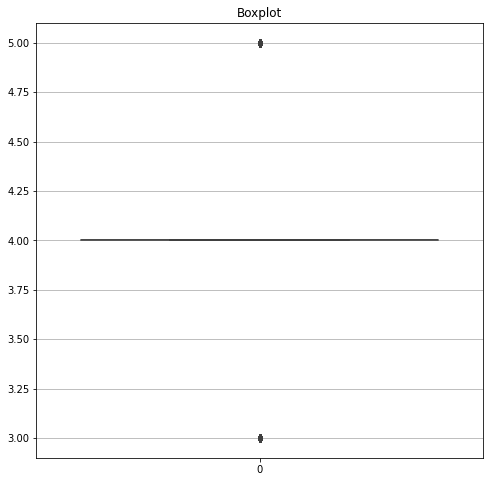

In [27]:
#График «ящик с усами» 
plt.figure(figsize=(8, 8))
plt.grid(True)
plt.title('Boxplot')
sns.boxplot(data=market_file['маркет_актив_тек_мес'])

In [28]:
market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


In [29]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [30]:
def pie(df, column):
    df[column].value_counts().plot(kind='pie', grid=True, figsize=(16, 8))
    print (df[column].value_counts() / df[column].count())

Прежний уровень    0.616923
Снизилась          0.383077
Name: покупательская_активность, dtype: float64


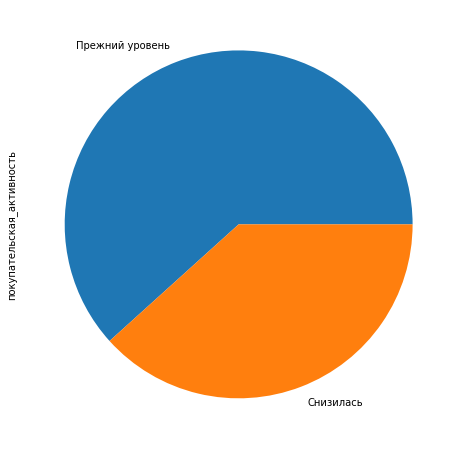

In [31]:
pie(market_file, 'покупательская_активность')

стандарт    0.710769
премиум     0.289231
Name: тип_сервиса, dtype: float64


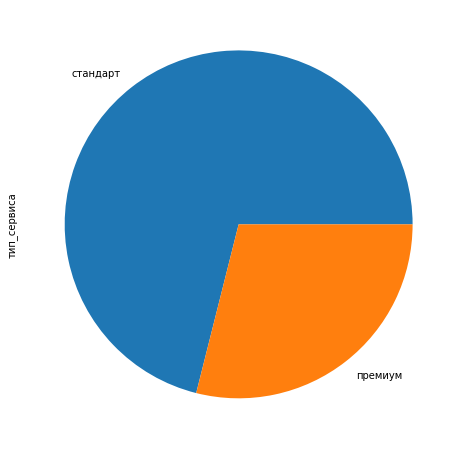

In [32]:
pie(market_file, 'тип_сервиса')

да     0.74
нет    0.26
Name: разрешить_сообщать, dtype: float64


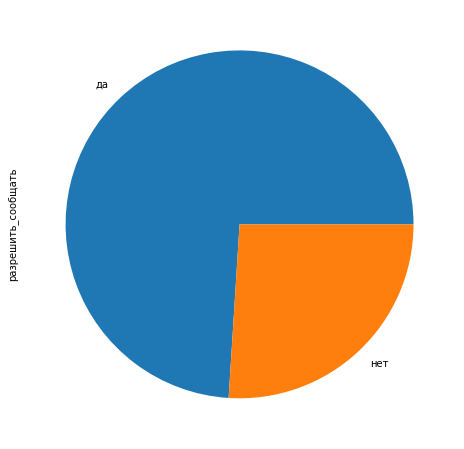

In [33]:
pie(market_file, 'разрешить_сообщать')

Товары для детей                        0.253846
Домашний текстиль                       0.193077
Косметика и аксесуары                   0.171538
Техника для красоты и здоровья          0.141538
Мелкая бытовая техника и электроника    0.133846
Кухонная посуда                         0.106154
Name: популярная_категория, dtype: float64


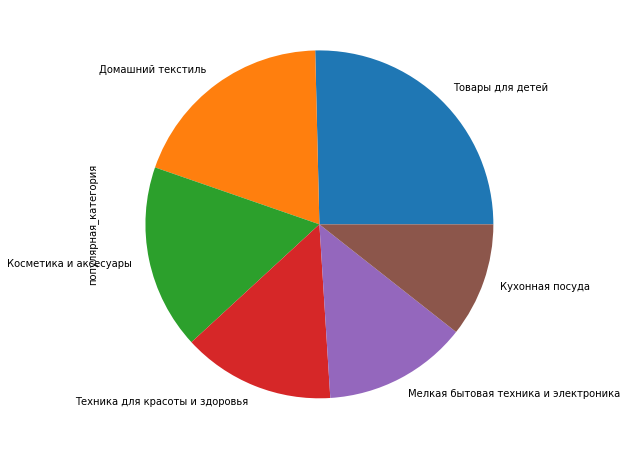

In [34]:
pie(market_file, 'популярная_категория')

В столбцах: 'покупательская_активность', 'тип_сервиса' и 'разрешить_сообщать' наблюдается дисбаланс в значениях. 

### Датафрейм market_money

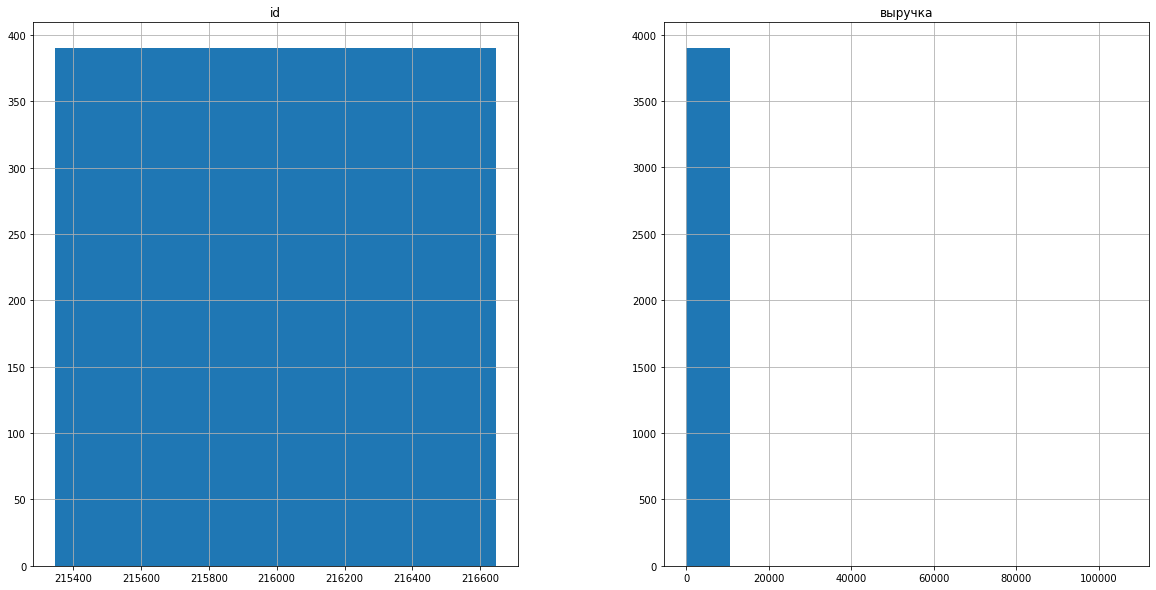

In [35]:
market_money.hist(figsize=(20, 10));

In [36]:
market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


In [37]:
# Избавимся от выброса
#market_money = market_money[market_money['выручка'] != 106862.2]
#market_money = market_money[market_money['выручка'] != 0]
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


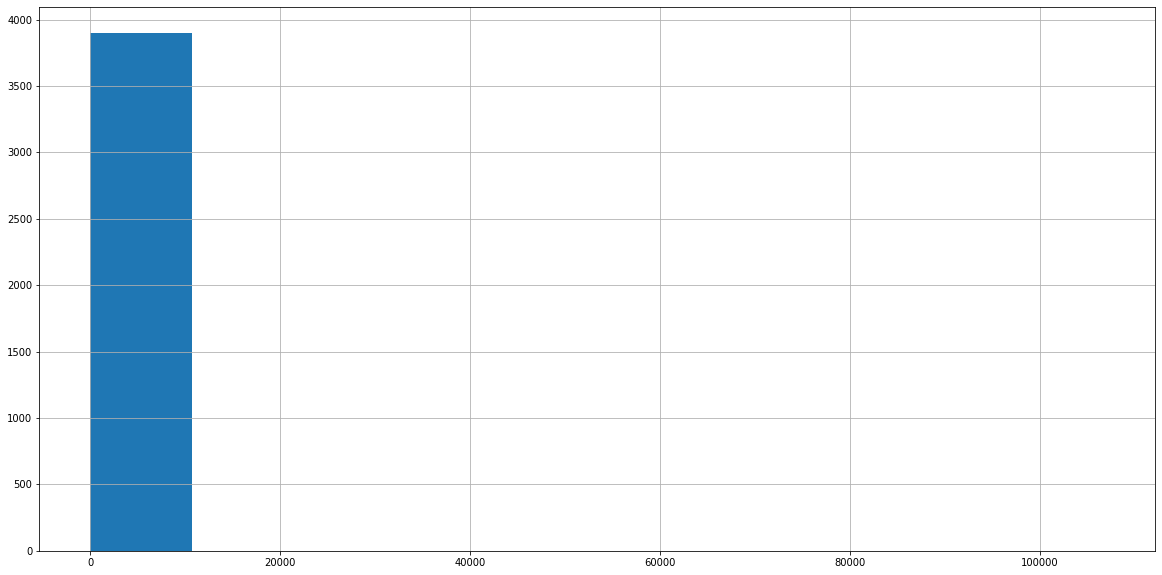

In [38]:
# Выбросы отсутсвуют 
market_money['выручка'].hist(figsize=(20, 10));

In [39]:
market_money['выручка'].describe()

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

предыдущий_месяц    0.666667
текущий_месяц       0.333333
Name: период, dtype: float64


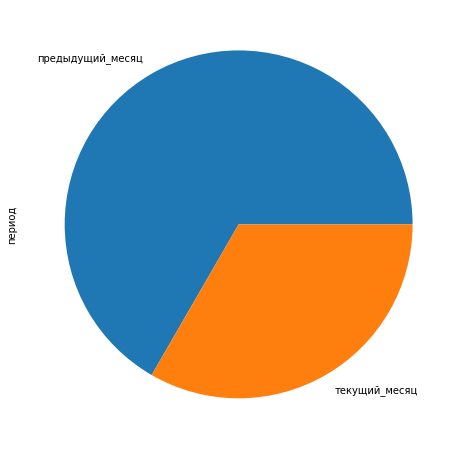

In [40]:
pie(market_money, 'период')

### Датафрейм market_time

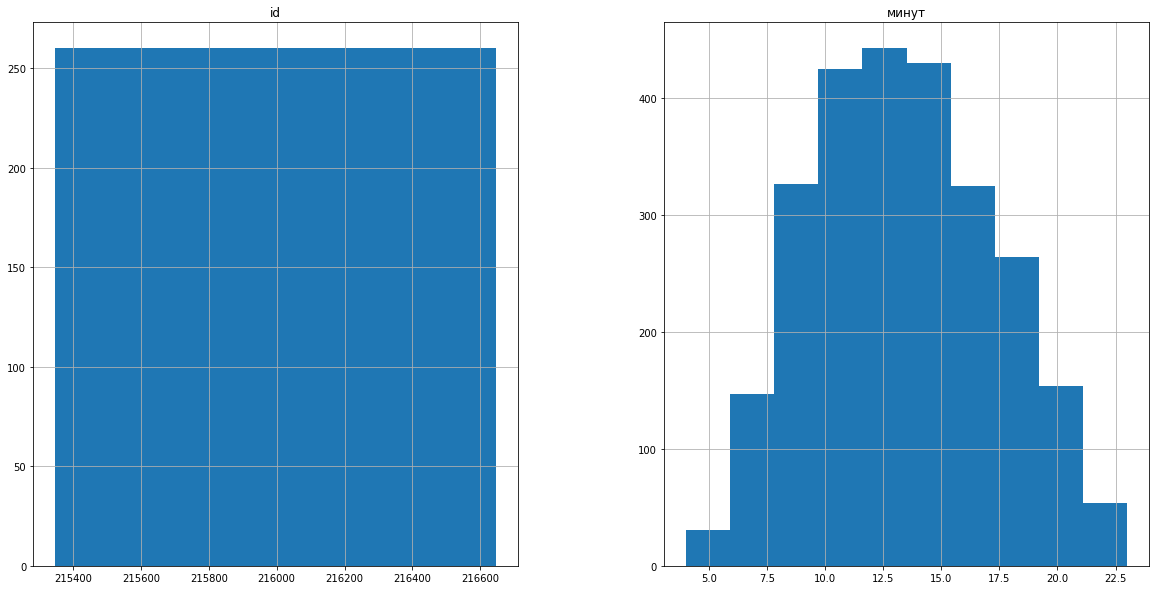

In [41]:
market_time.hist(figsize=(20, 10));

In [42]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


предыдцщий_месяц    0.5
текущий_месяц       0.5
Name: период, dtype: float64


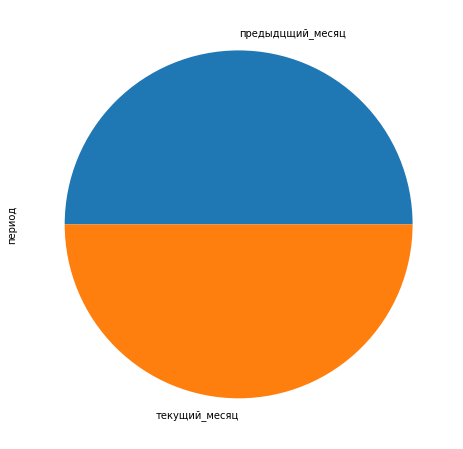

In [43]:
pie(market_time, 'период')

### Датафрейм  money

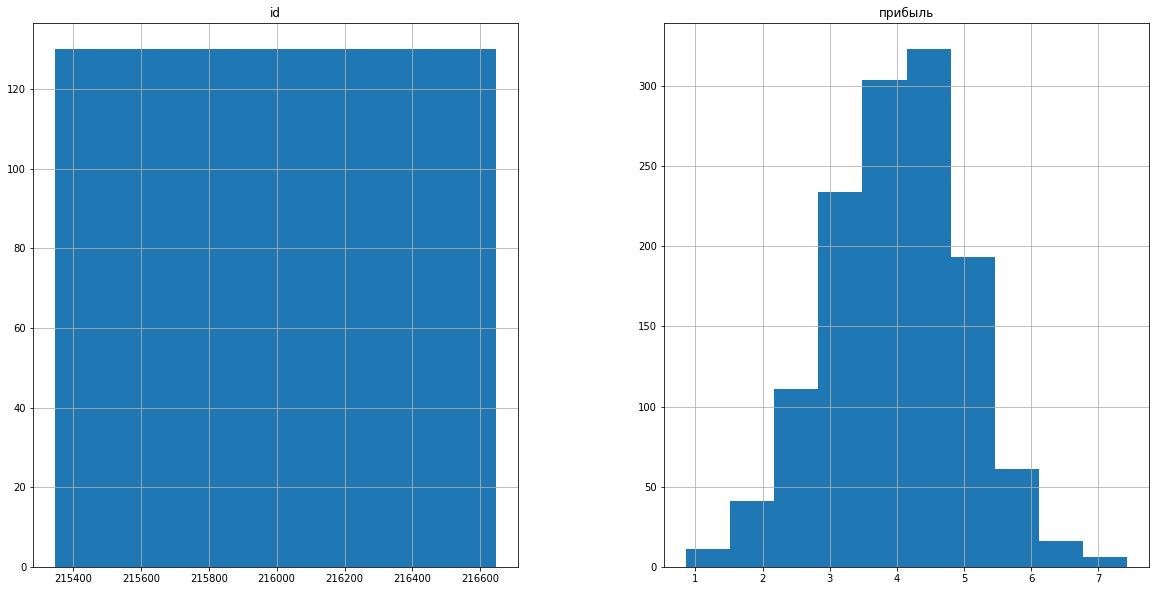

In [44]:
money.hist(figsize=(20, 10));

In [45]:
money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


**Вывод:** 
- В столбцах датафрейма market_file: 'покупательская_активность', 'тип_сервиса' и 'разрешить_сообщать' наблюдается дисбаланс в значениях. <ыли удалены выбросы в столбцах 'акционные_покупки', 'маркет_актив_6_мес', 'неоплаченные_продукты_штук_квартал', 'страниц_за_визит'.
- В датафреме market_money были удалены выбросы в столбце 'выручка'. Замечен дисбаланс в столбце 'период'.
- В датафреме market_time не были замечены выбросы и дисбаланс.
- В датафреме money не было замечено выбросов.

Для того чтобы отобрать пользователей с активностью не менее трех месяцев нужно взять id пользователей из датафрейма money, так как это таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца.

## Объединение таблиц

In [46]:
m_money = pd.pivot_table(market_money, index='id', columns='период', values='выручка')
m_money = m_money.reset_index()
m_money.columns = ['id', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']
m_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1300 non-null   int64  
 1   выручка_предыдущий_месяц  1300 non-null   float64
 2   выручка_текущий_месяц     1300 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 30.6 KB


In [47]:
m_time = pd.pivot_table(market_time, index='id', columns='период', values='минут')
m_time = m_time.reset_index()
m_time.columns = ['id', 'минут_предыдущий_месяц', 'минут_текущий_месяц']
m_time

,id,минут_предыдущий_месяц,минут_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11
...,...,...,...
1295,216643,14,7
1296,216644,12,11
1297,216645,12,18
1298,216646,18,7


In [48]:
# Переимнование столбцов
# print(market_money.columns, '\n', market_time.columns, '\n')
# market_money = market_money.rename(columns={'период':'период_деньги'})
# market_time = market_time.rename(columns={'период':'период_время'})
# print(market_money.columns, '\n', market_time.columns)

In [49]:
# Установим новые индексы
market_file = market_file.set_index('id')
m_money = m_money.set_index('id')
m_time = m_time.set_index('id')
money = money.set_index('id')

In [50]:
# Объединим таблицы
data = market_file.join(m_money, on='id')
data = data.join(m_time, on='id')
data = data.fillna(0)
data = data[data['выручка_предыдущий_месяц'] != 0]
data = data[data['выручка_текущий_месяц'] != 106862.2]
data.head(10)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4844.00,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5141.75,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,5475.50,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5200.75,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4931.25,5388.5,10,10
215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5094.00,5869.6,11,12
215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,4006.00,3772.6,12,10
215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4289.75,4566.4,6,7
215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,4107.50,4209.5,14,10


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

**Вывод:** Объединение прошло успешно. Количество столбцов и их типы соответсуют ожиданиям.

## Корреляционный анализ

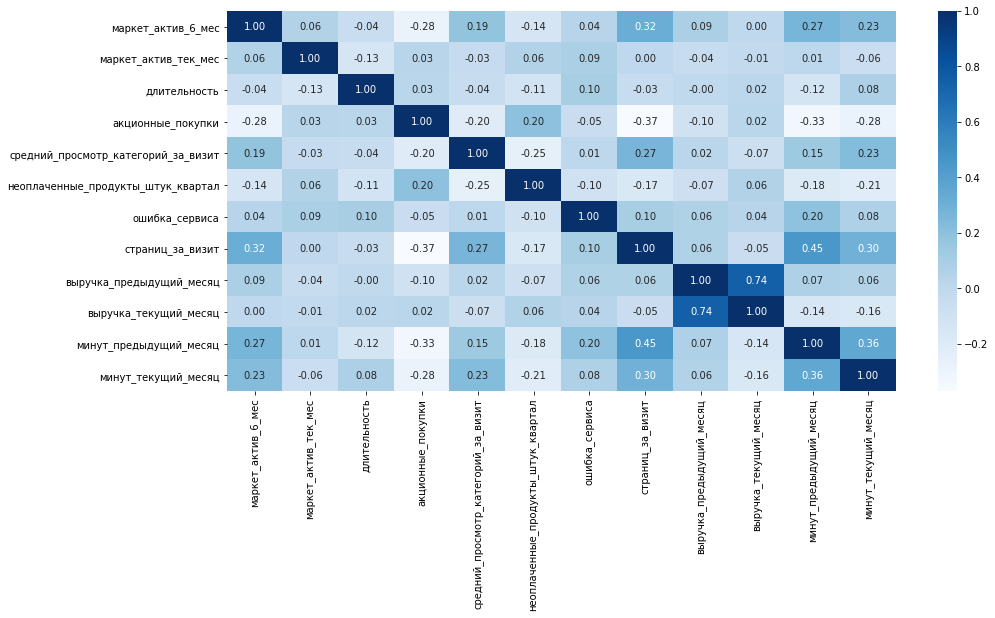

In [52]:
plt.figure(figsize=(15, 7))
cm = data.corr(method='spearman')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues');

**Вывод:** Мультиколлинеарность отсутсвует.

## Использование пайплайнов

In [53]:
# Отбор признаков и разбиение на тренировочную и тестовую выборки
RANDOM_STATE = 42
TEST_SIZE = 0.25

label_encoder = LabelEncoder()
label_encoder.classes = np.array(['Снизилась', 'Не снизилась'])   

X = data.drop('покупательская_активность', axis=1)
y = label_encoder.fit_transform(data['покупательская_активность'])

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

In [54]:
X_train.head(10)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,
215858,стандарт,да,5.5,4,510,0.15,Мелкая бытовая техника и электроника,2,4,7,16,4758.75,6014.2,20,6
215361,стандарт,да,5.1,4,199,0.23,Техника для красоты и здоровья,4,5,2,3,5498.50,3789.7,11,13
215884,стандарт,да,4.3,5,997,0.17,Мелкая бытовая техника и электроника,5,1,3,11,4369.50,3798.4,13,10
216564,стандарт,да,5.6,4,342,0.94,Кухонная посуда,2,7,5,8,5099.50,4766.2,14,19
215715,премиум,да,3.6,5,873,0.39,Товары для детей,3,2,2,5,4203.50,4600.0,10,10
216533,стандарт,нет,5.7,5,769,0.14,Техника для красоты и здоровья,4,1,8,10,5396.50,5180.3,15,20
215674,стандарт,да,3.0,4,304,0.25,Домашний текстиль,1,6,5,3,4547.25,4762.2,11,11
216334,премиум,да,6.1,3,1056,0.17,Домашний текстиль,2,3,7,8,5041.25,4423.0,15,17
216186,стандарт,да,4.3,4,831,0.21,Мелкая бытовая техника и электроника,5,2,3,7,4284.50,3287.0,11,17


In [55]:
ohe_columns = ['популярная_категория', 'разрешить_сообщать']
ord_columns = ['тип_сервиса']
num_columns = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 
               'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 
               'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц',
               'минут_предыдущий_месяц', 'минут_текущий_месяц']

In [56]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(drop='first', handle_unknown='error'), ohe_columns),
        ('ord', OrdinalEncoder(), ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

In [57]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [58]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(10, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': [1, 10, 50, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(
            probability=True
        )],
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [59]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [60]:
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс валидацинной выборке:', randomized_search.best_score_)

y_test_pred = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['популярная_категория',
                                                   'разрешить_сообщать']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['тип_сервиса']),
                                                 ('num', StandardScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_ви

**Вывод:** ROC-AUC будет подходящей для задачи метрикой, так как используется несколько принципаильно разных моделей.
Лучшая модель имеет высокиие показатели как на тренировочной выборке, так и на тестовой. Однако, на основе разницы метрик, можно сделать вывод о переобученности модели.

## Анализ важности признаков

In [61]:
best_model = randomized_search.best_estimator_.named_steps['models']
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

X_train_new = preprocessor.transform(X_train)
X_test_new = preprocessor.transform(X_test)

feature_names = np.concatenate(
    [
        preprocessor.named_transformers_['ohe'].get_feature_names(input_features=ohe_columns),
        ord_columns,
        num_columns
    ]
)
X_train_new = pd.DataFrame(X_train_new, columns=feature_names)

In [62]:
X_train_new_ = shap.sample(X_train_new, 100, random_state=RANDOM_STATE)

explainer = shap.KernelExplainer(best_model.predict_proba, X_train_new_)
shap_values = explainer(X_train_new_)

  0%|          | 0/100 [00:00<?, ?it/s]

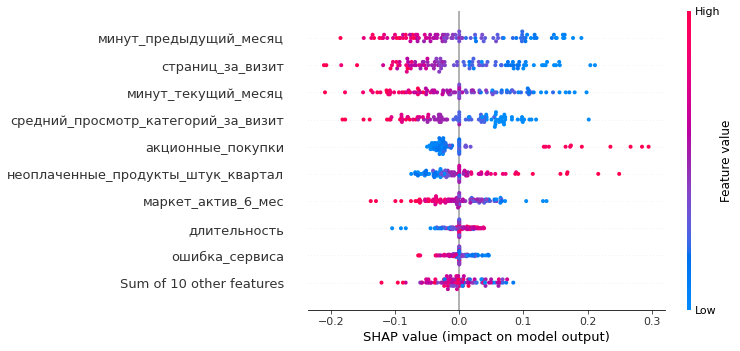

In [63]:
shap.plots.beeswarm(shap_values[:,:,1])

**Вывод:** 

Мало значимые признаки:
- Неоплаченные продукты штук квартал 
- Маркет актив 6 мес
- Длительность
- Ошибка сервиса

Признаки с наибольшим влиянием на целевой признак:
- Минут за предыдущий месяц
- Страницы за визит 
- Минут за текущий месяц
- Средний просмотр категорий за визит  
- Акционные покупки

Интерпритация:
- Чем больше минут пользователь проводит на сайте, тем выше его пренадлежность к классу 0. 
- Чем больше страниц пользователь посещает за визит, тем выше его пренадлежность к классу 0. 
- Чем больше категорий пользователь просматривает за визит, тем выше его пренадлежность к классу 0. 
- Чем меньше пользователь делает аукционных покупок, тем выше его пренадлежность к классу 0. 

Такие признаки, как количество страниц за визит, акционные покупки и количество минут, проведенных на сайте, оказывают значительное влияние на целевой признак. Это означает, что данные метрики важно учитывать при разработке стратегии повышения пользовательской активности и увеличения продаж.

## Сегментация покупателей

### Сегментация покупателей

In [64]:
X = preprocessor.transform(X)

In [65]:
predictions = best_model.predict_proba(X)[:, 1]
predictions_1 = np.where(predictions > 0.9, True, False)
down = data[predictions_1] 
down = down.join(money, on='id')
down.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 215356 to 215747
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            204 non-null    object 
 1   тип_сервиса                          204 non-null    object 
 2   разрешить_сообщать                   204 non-null    object 
 3   маркет_актив_6_мес                   204 non-null    float64
 4   маркет_актив_тек_мес                 204 non-null    int64  
 5   длительность                         204 non-null    int64  
 6   акционные_покупки                    204 non-null    float64
 7   популярная_категория                 204 non-null    object 
 8   средний_просмотр_категорий_за_визит  204 non-null    int64  
 9   неоплаченные_продукты_штук_квартал   204 non-null    int64  
 10  ошибка_сервиса                       204 non-null    int64  
 11  страниц_за_визит        

### Графическое и аналитическое исследование группы покупателей

In [66]:
# Отберем группу клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
segment = down[(down['популярная_категория'] == 'Техника для красоты и здоровья') | 
               (down['популярная_категория'] == 'Мелкая бытовая техника и электроника')]
segment.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль
id,,,,,,,,,,,,,,,,,
215368,Снизилась,премиум,да,3.8,5,829,0.24,Техника для красоты и здоровья,2,2,6,1,5179.50,5591.6,11,9,6.27
215383,Снизилась,стандарт,да,2.7,4,504,0.33,Техника для красоты и здоровья,2,4,2,4,5144.50,5989.0,7,10,4.27
215398,Снизилась,премиум,да,3.5,5,882,0.22,Мелкая бытовая техника и электроника,3,2,6,3,5043.75,5854.2,5,6,4.77
215403,Снизилась,премиум,да,1.7,5,771,0.39,Техника для красоты и здоровья,1,8,2,5,5390.50,6427.2,7,8,3.73
215421,Снизилась,премиум,нет,4.0,5,523,0.94,Техника для красоты и здоровья,1,10,7,5,4850.75,5322.9,11,13,3.18


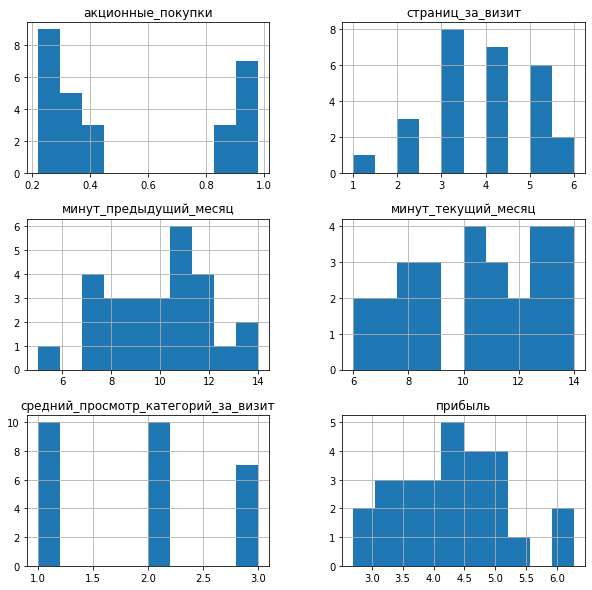

In [67]:
# Рассмотрим признаки с наибольшим влиянием на целевой
to_hist = segment[['акционные_покупки', 'страниц_за_визит', 'минут_предыдущий_месяц', 
                   'минут_текущий_месяц', 'средний_просмотр_категорий_за_визит', 'прибыль']]
to_hist.hist(figsize=(10, 10));

In [68]:
to_hist.describe()

,акционные_покупки,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,средний_просмотр_категорий_за_визит,прибыль
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.528148,3.740741,9.962963,10.444444,1.888889,4.295556
std,0.320325,1.258589,2.311867,2.562050,0.800641,0.886347
min,0.220000,1.000000,5.000000,6.000000,1.000000,2.700000
25%,0.245000,3.000000,8.000000,8.500000,1.000000,3.635000
50%,0.350000,4.000000,10.000000,10.000000,2.000000,4.260000
75%,0.915000,5.000000,11.500000,13.000000,2.500000,4.890000
max,0.980000,6.000000,14.000000,14.000000,3.000000,6.270000


In [69]:
data.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4844.00,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5141.75,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,5475.50,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5200.75,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4931.25,5388.5,10,10


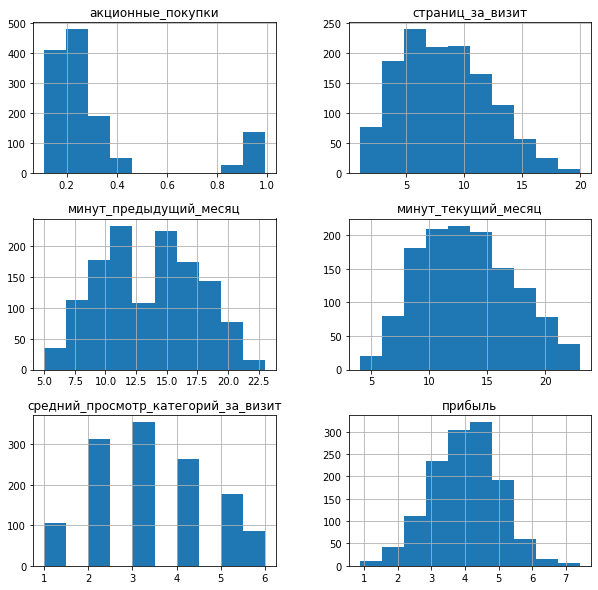

In [70]:
comp_data = data.join(money, on='id')
comp_data = comp_data[['акционные_покупки', 'страниц_за_визит', 'минут_предыдущий_месяц', 
                  'минут_текущий_месяц', 'средний_просмотр_категорий_за_визит', 'прибыль']]
comp_data.hist(figsize=(10, 10));

In [71]:
comp_data.describe()

,акционные_покупки,страниц_за_визит,минут_предыдущий_месяц,минут_текущий_месяц,средний_просмотр_категорий_за_визит,прибыль
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,0.320069,8.187500,13.470679,13.210648,3.267747,3.997701
std,0.249159,3.978459,3.937630,4.221794,1.355125,1.011198
min,0.110000,1.000000,5.000000,4.000000,1.000000,0.860000
25%,0.170000,5.000000,10.750000,10.000000,2.000000,3.300000
50%,0.240000,8.000000,13.000000,13.000000,3.000000,4.045000
75%,0.300000,11.000000,17.000000,16.000000,4.000000,4.670000
max,0.990000,20.000000,23.000000,23.000000,6.000000,7.430000


**Вывод:** для исследования была выбрана группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом. Для увеличения её покупательской активности было предложено:  
- увеличить количество рекомендаций карточек товаров на основе запросов пользователя, так как количество страниц за визит в два раза меньше среднего по всем данным.
- с целью стимулирования пользователей к покупке, предлагается увеличить количество персонализированных акционных предложений, так как наблюдаются аномально низкие значения в диапозоне от 0.5 до 0.8 в признаке акционные_покупки. Также справделиво для всего датафрейма.
- так как прибыль данного сегмента пользователей выше средней по всей выборке из-за высоких цен на технику в сравнении с другими категориями, то предлагаю рекомендовать пользователям подкатегории из категории техники, которые они еще не приобрели. Например, пользователь купил чайник, в таком случае можно порекомендовать ему другую  кухонную технику.  

## Общий вывод


* На этапк загрузки данных было выявлено, что данные соответствуют описанию задачи. 
* На этапе предобработке данных названия столбцов были приведены к нормальному виду во всех датафремах. Пропуски и явные дубликаты в данных отсутствовали. А неявные были обработаны.
* На эатпе исследовательского анализа данных были сделаны следующие выводы. 
    - В столбцах датафрейма market_file: 'покупательская_активность', 'тип_сервиса' и 'разрешить_сообщать' наблюдается дисбаланс в значениях. 
    - В датафреме market_money были удалены выбросы в столбце 'выручка'. Замечен дисбаланс в столбце 'период'.
    - В датафреме market_time не были замечены выбросы и дисбаланс.
    - В датафреме money не было замечено выбросов.
    - Для того чтобы отобрать пользователей с активностью не менее трех месяцев нужно взять id пользователей из датафрейма money, так как это таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца.

* Далее были успешно объединены таблицы 
* Во время корреляционного анализа принзнаков мультиколлинеарность не была выявлена
* С исопльзованием пайпалйнов была выбрана наилучшая модель (KNeighborsClassifier (n_neighbors=9)), которая имеет высокиие показатели как на тренировочной выборке, так и на тестовой. Однако, на основе разницы метрик, можно сделать вывод о переобученности модели. ROC-AUC будет подходящей для задачи метрикой, так как используется несколько принципаильно разных моделей.
* На эатпе анализа важности признаков были сделаны следующие выводы:
        Мало значимые признаки:
        - Ошибка сервиса 
        - Неоплаченные продукты штук квартал 
        - Длительность
        - Популярная категория 
        - Маркет актив 6 мес

        Признаки с наибольшим влиянием на целевой признак:
        - Страницы за визит 
        - Акционные покупки 
        - Минут 
        - Средний просмотр категорий за визит 

         Интерпритация:
        - Чем больше страниц пользователь посещает за визит, тем выше его пренадлежность к классу 1. 
        - Чем больше пользователь делает аукционных покупок, тем выше его пренадлежность к классу 0. 
        - Чем больше мину пользователь проводит на сайте, тем выше его пренадлежность к классу 1. 


        Такие признаки, как количество страниц за визит, акционные покупки и количество минут, проведенных на сайте, оказывают значительное влияние на целевой признак. Это означает, что данные метрики важно учитывать при разработке стратегии повышения пользовательской активности и увеличения продаж.
* Для исследования была выбрана группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом. Для увеличения её покупательской активности было предложено:  
    - увеличить количество рекомендаций карточек товаров на основе запросов пользователя, так как количество страниц за визит в два раза меньше среднего по всем данным.
    - с целью стимулирования пользователей к покупке, предлагается увеличить количество персонализированных акционных предложений, так как наблюдаются аномально низкие значения в диапозоне от 0.5 до 0.8 в признаке акционные_покупки. Также справделиво для всего датафрейма.
